## **CIND820 - Capstone Project**



# **Investigate Airline passenger satisfaction using Machine Learning Techniques**


# **Preparation:**

In [ ]:
! python -V

Python 3.10.12


Import csv file (the dataset and the data dictionary)



In [1]:
# Importing required libraries

import pandas as pd

import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn import preprocessing

In [2]:
# Import the dataset
# Use first column "ID" as Index by using index_col=0

url = 'https://raw.githubusercontent.com/HitomiMo/CIND820_Capstone-Project/main/airline_passenger_satisfaction.csv'
df1 = pd.read_csv(url, index_col=0)
df1.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
ID,,,,,,,,,,,,,,,,,,,,,
1,Male,48,First-time,Business,Business,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
2,Female,35,Returning,Business,Business,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
3,Male,41,Returning,Business,Business,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [ ]:
# Import the dictionary

url2 = 'https://raw.githubusercontent.com/HitomiMo/CIND820_Capstone-Project/main/data_dictionary.csv'
data_dictionary = pd.read_csv(url2, index_col=0)
data_dictionary

,Description
Field,
ID,Unique passenger identifier
Gender,Gender of the passenger (Female/Male)
Age,Age of the passenger
Customer Type,Type of airline customer (First-time/Returning)
Type of Travel,Purpose of the flight (Business/Personal)
Class,Travel class in the airplane for the passenger...
Flight Distance,Flight distance in miles
Departure Delay,Flight departure delay in minutes
Arrival Delay,Flight arrival delay in minutes


# **Exploratory Data Analysis (EDA)**

Install pandas-profiling

In [ ]:
pip install pandas-profiling

In [ ]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df1)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df1.head(10)

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
ID,,,,,,,,,,,,,,,,,,,,,
1,Male,48,First-time,Business,Business,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
2,Female,35,Returning,Business,Business,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
3,Male,41,Returning,Business,Business,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied
6,Male,43,Returning,Business,Business,3788,0,0.0,4,4,...,4,4,4,3,3,4,4,4,4,Satisfied
7,Male,43,Returning,Business,Business,1963,0,0.0,3,3,...,5,5,5,4,5,5,3,5,5,Satisfied
8,Female,60,Returning,Business,Business,853,0,3.0,3,4,...,3,4,4,4,4,3,4,3,3,Satisfied
9,Male,50,Returning,Business,Business,2607,0,0.0,1,1,...,4,3,4,3,3,4,4,4,4,Neutral or Dissatisfied


Check the dataset

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 1 to 129880
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129880 non-null  object 
 1   Age                                     129880 non-null  int64  
 2   Customer Type                           129880 non-null  object 
 3   Type of Travel                          129880 non-null  object 
 4   Class                                   129880 non-null  object 
 5   Flight Distance                         129880 non-null  int64  
 6   Departure Delay                         129880 non-null  int64  
 7   Arrival Delay                           129487 non-null  float64
 8   Departure and Arrival Time Convenience  129880 non-null  int64  
 9   Ease of Online Booking                  129880 non-null  int64  
 10  Check-in Service                        1298

**Observation:**
*   Number of variable: 23
*   Number of entries: 129880




Check missing data

In [ ]:
missing_values = pd.isnull(df1)
missing_values.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
ID,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df1.isnull().sum()

Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment                     0
Baggage Handling                  

Check description of the data

In [ ]:
df1.describe()

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Check distribution of numerical variables in histgram

In [ ]:
# import numpy as np
# import seaborn as sns
# from matplotlib import pyplot as plt

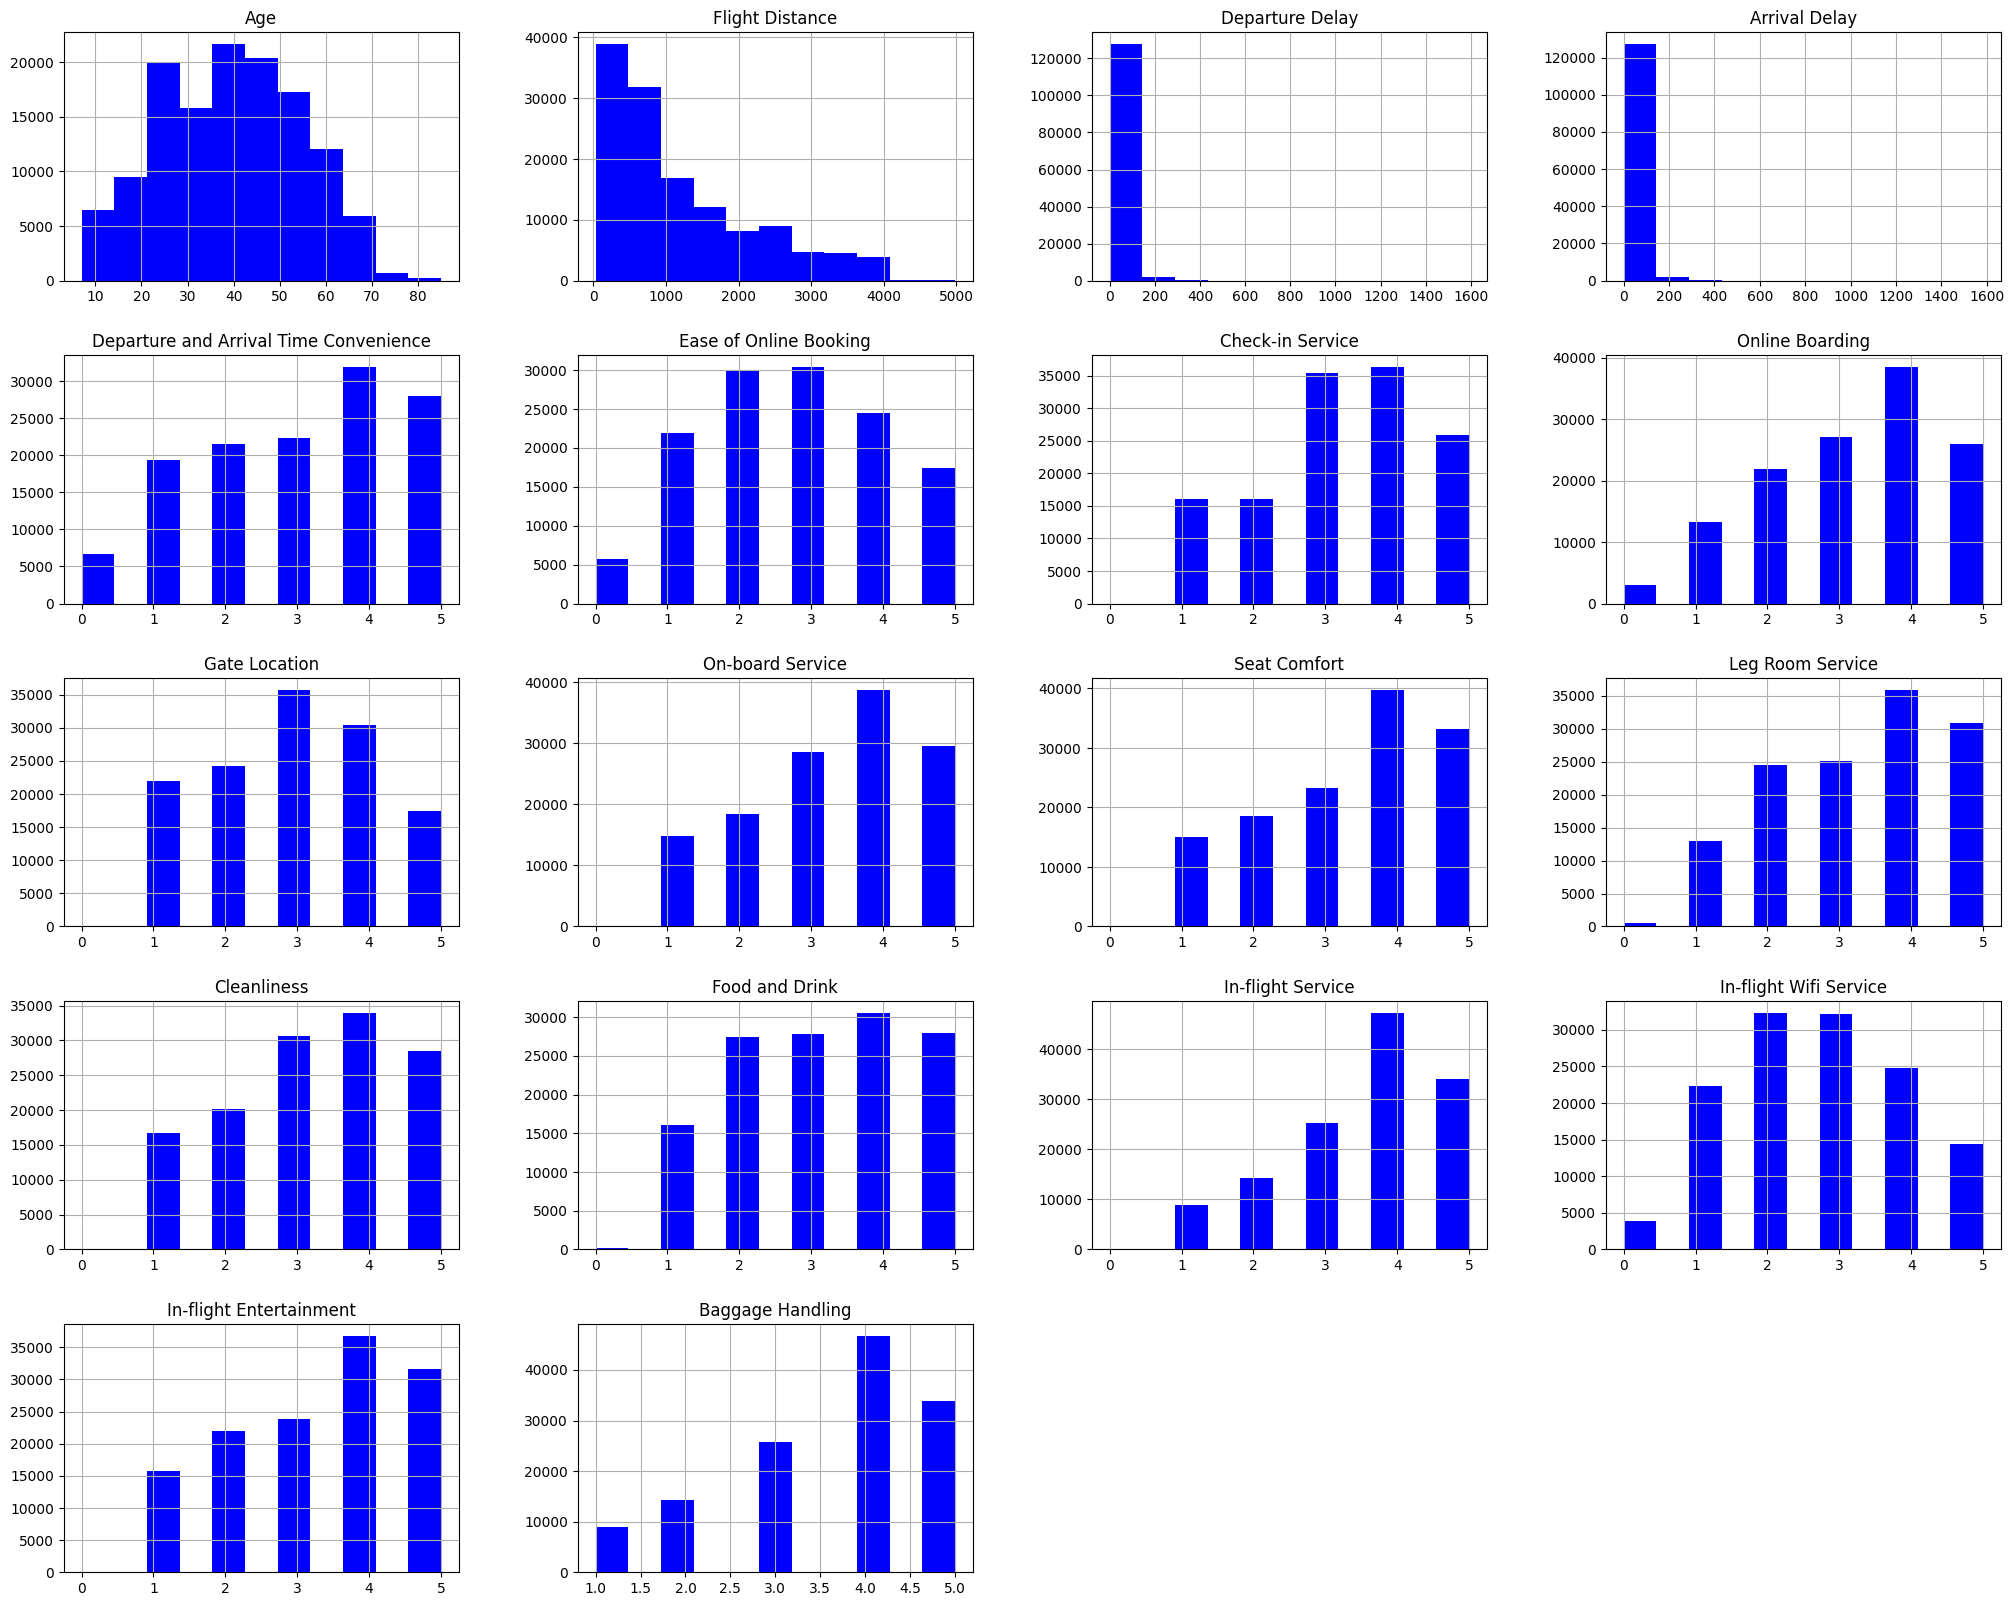

In [ ]:
binwidth=2
df1.iloc[:,1:].hist(bins=11, figsize=(25,20), color='blue')
plt.show()

Check categorical veriables

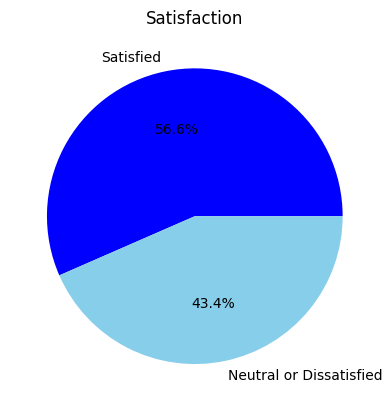

In [ ]:
y = df1["Satisfaction"].value_counts()
labels = ["Satisfied", "Neutral or Dissatisfied"]
mycolors = ["blue", "skyblue"]
y = df1["Satisfaction"].value_counts()
plt.pie(y, labels = labels, colors = mycolors, autopct = '%1.1f%%')
plt.title('Satisfaction')
plt.show()

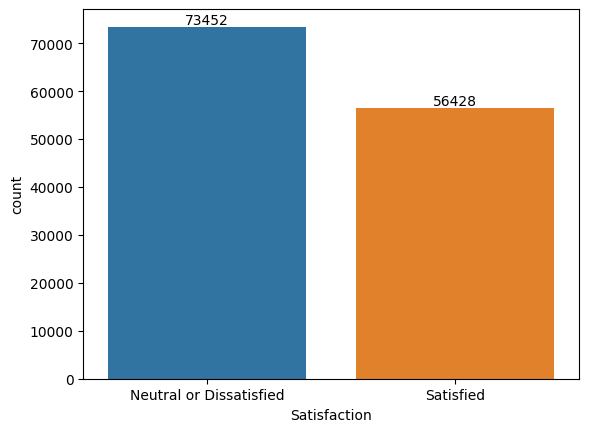

In [ ]:
# ChecK the # of customers - Satisfaction
mycolors2 = ["blue", "skyblue"]
s = sns.countplot(x='Satisfaction',data=df1)
abs_values = df1['Satisfaction'].value_counts().values

s.bar_label(container=s.containers[0], labels=abs_values);

**Observation:**


*   Satisfaction is a terget class and it is imbalanced.



Pie chart for Gender

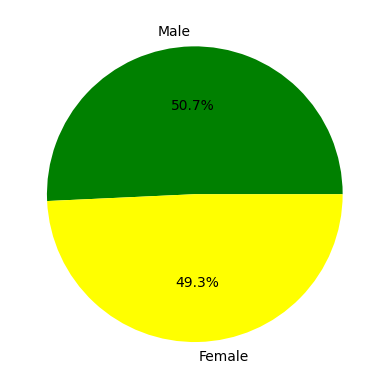

In [ ]:
y = df1["Gender"].value_counts()
labels = ["Male", "Female"]
mycolors = ["Green", "Yellow"]
plt.pie(y, labels = labels,colors=mycolors ,autopct='%1.1f%%')
plt.show()

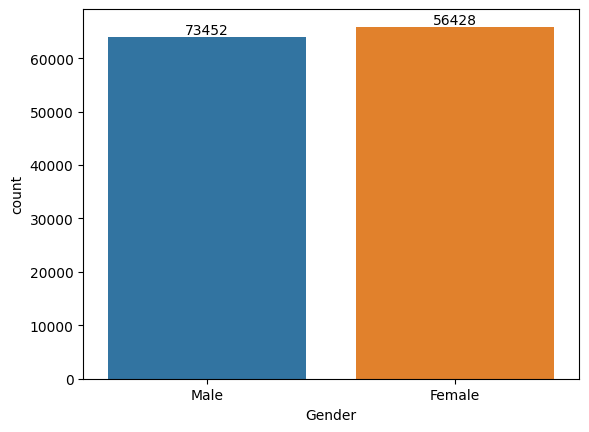

In [ ]:
# ChecK the # of customers - Gender
s = sns.countplot(x='Gender',data=df1)
abs_values = df1['Satisfaction'].value_counts().values

s.bar_label(container=s.containers[0], labels=abs_values);

In [ ]:
# Grouping the data points based on Gender
df1.groupby('Gender')['Satisfaction'].value_counts()

Gender  Satisfaction           
Female  Neutral or Dissatisfied    37630
        Satisfied                  28269
Male    Neutral or Dissatisfied    35822
        Satisfied                  28159
Name: Satisfaction, dtype: int64

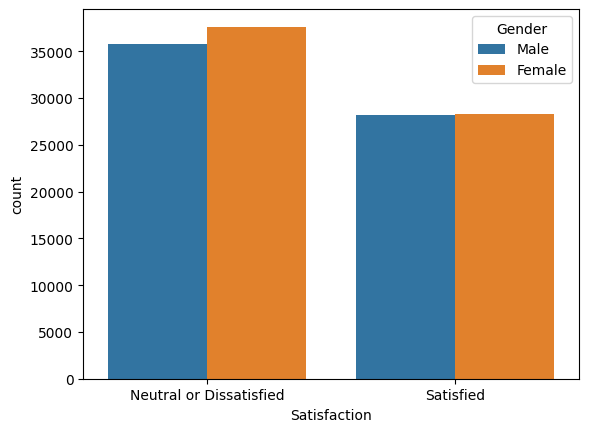

In [ ]:
sns.countplot(data = df1, x= df1['Satisfaction'], hue = df1["Gender"]);

Pie chart for Customer Type

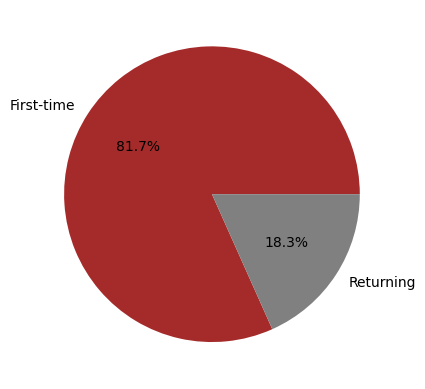

In [ ]:
y = df1["Customer Type"].value_counts()
labels = ["First-time", "Returning"]
mycolors = ["Brown", "Gray"]
plt.pie(y, labels = labels,colors=mycolors ,autopct='%1.1f%%')
plt.show()

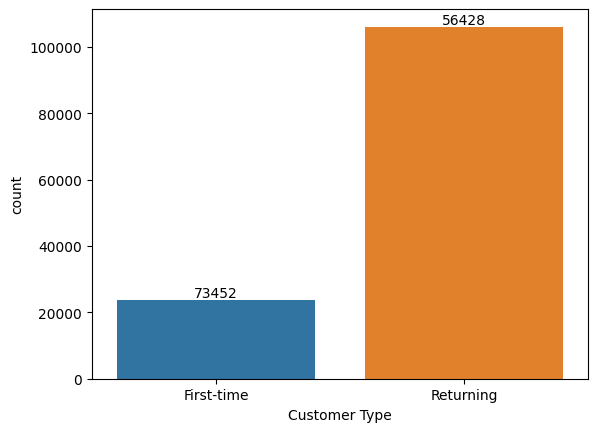

In [ ]:
# ChecK the # of customers - Customer Type
s = sns.countplot(x='Customer Type',data=df1)
abs_values = df1['Satisfaction'].value_counts().values

s.bar_label(container=s.containers[0], labels=abs_values);

In [ ]:
# Grouping the data points based on Customer Type
df1.groupby('Customer Type')['Satisfaction'].value_counts()

Customer Type  Satisfaction           
First-time     Neutral or Dissatisfied    18080
               Satisfied                   5700
Returning      Neutral or Dissatisfied    55372
               Satisfied                  50728
Name: Satisfaction, dtype: int64

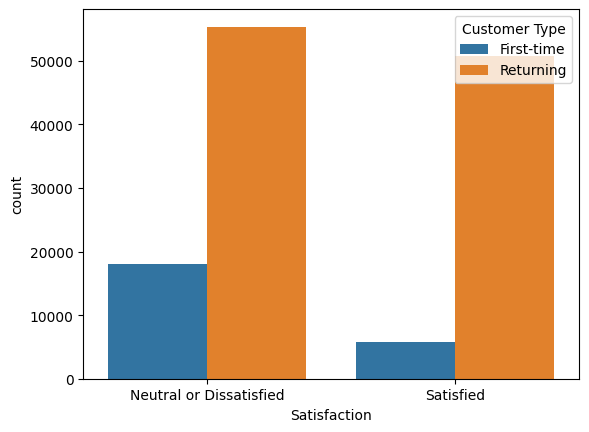

In [ ]:
sns.countplot(data = df1, x= df1['Satisfaction'], hue = df1["Customer Type"]);

Pic chart for Type of Travel

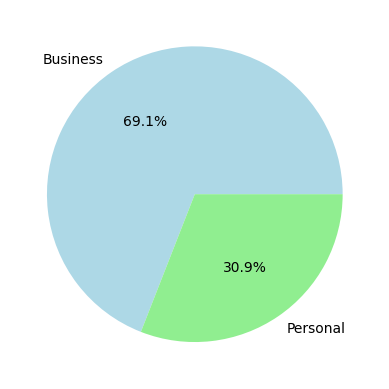

In [ ]:
y = df1["Type of Travel"].value_counts()
labels = ["Business", "Personal"]
mycolors = ["Lightblue", "Lightgreen"]
plt.pie(y, labels = labels,colors=mycolors ,autopct='%1.1f%%')
plt.show()

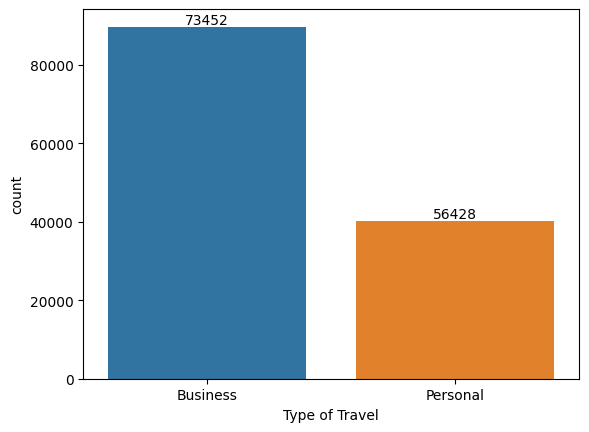

In [ ]:
# ChecK the # of customers - Customer Type
s = sns.countplot(x='Type of Travel',data=df1)
abs_values = df1['Satisfaction'].value_counts().values

s.bar_label(container=s.containers[0], labels=abs_values);

In [ ]:
# Grouping the data points based on Type of Travel
df1.groupby('Type of Travel')['Satisfaction'].value_counts()

Type of Travel  Satisfaction           
Business        Satisfied                  52356
                Neutral or Dissatisfied    37337
Personal        Neutral or Dissatisfied    36115
                Satisfied                   4072
Name: Satisfaction, dtype: int64

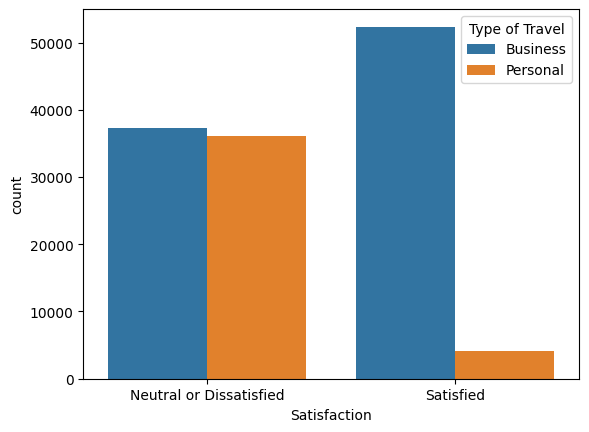

In [ ]:
sns.countplot(data = df1, x= df1['Satisfaction'], hue = df1["Type of Travel"]);

Pic chart for Class

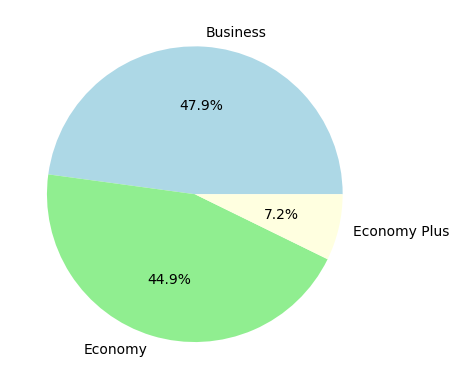

In [ ]:
y = df1["Class"].value_counts()
labels = ["Business", "Economy", "Economy Plus"]
mycolors = ["Lightblue", "Lightgreen", "Lightyellow"]
plt.pie(y, labels = labels,colors=mycolors ,autopct='%1.1f%%')
plt.show()

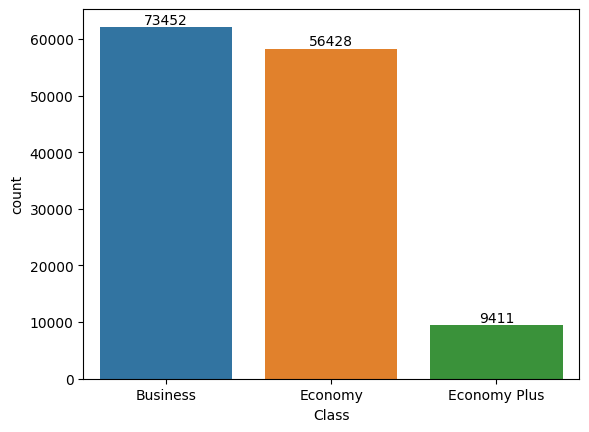

In [ ]:
# ChecK the # of customers - Customer Type
s = sns.countplot(x='Class',data=df1)
abs_values = df1['Satisfaction'].value_counts().values

s.bar_label(container=s.containers[0], labels=abs_values);

In [ ]:
# Grouping the data points based on Class
df1.groupby('Class')['Satisfaction'].value_counts()

Class         Satisfaction           
Business      Satisfied                  43166
              Neutral or Dissatisfied    18994
Economy       Neutral or Dissatisfied    47366
              Satisfied                  10943
Economy Plus  Neutral or Dissatisfied     7092
              Satisfied                   2319
Name: Satisfaction, dtype: int64

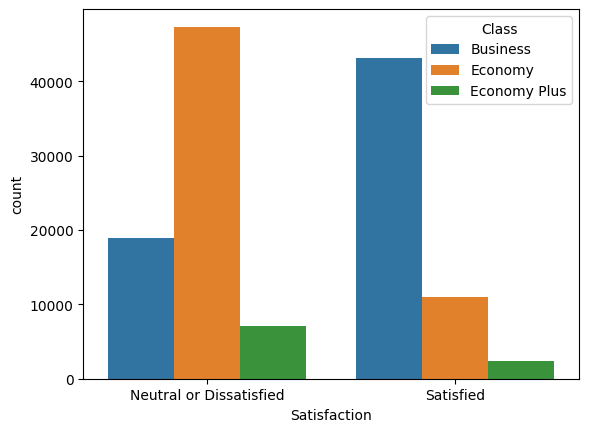

In [ ]:
sns.countplot(data = df1, x= df1['Satisfaction'], hue = df1["Class"]);

Check correlation matrix

<ipython-input-29-46ea086570be>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr() , annot = True , cmap = "YlGnBu")


<Axes: >

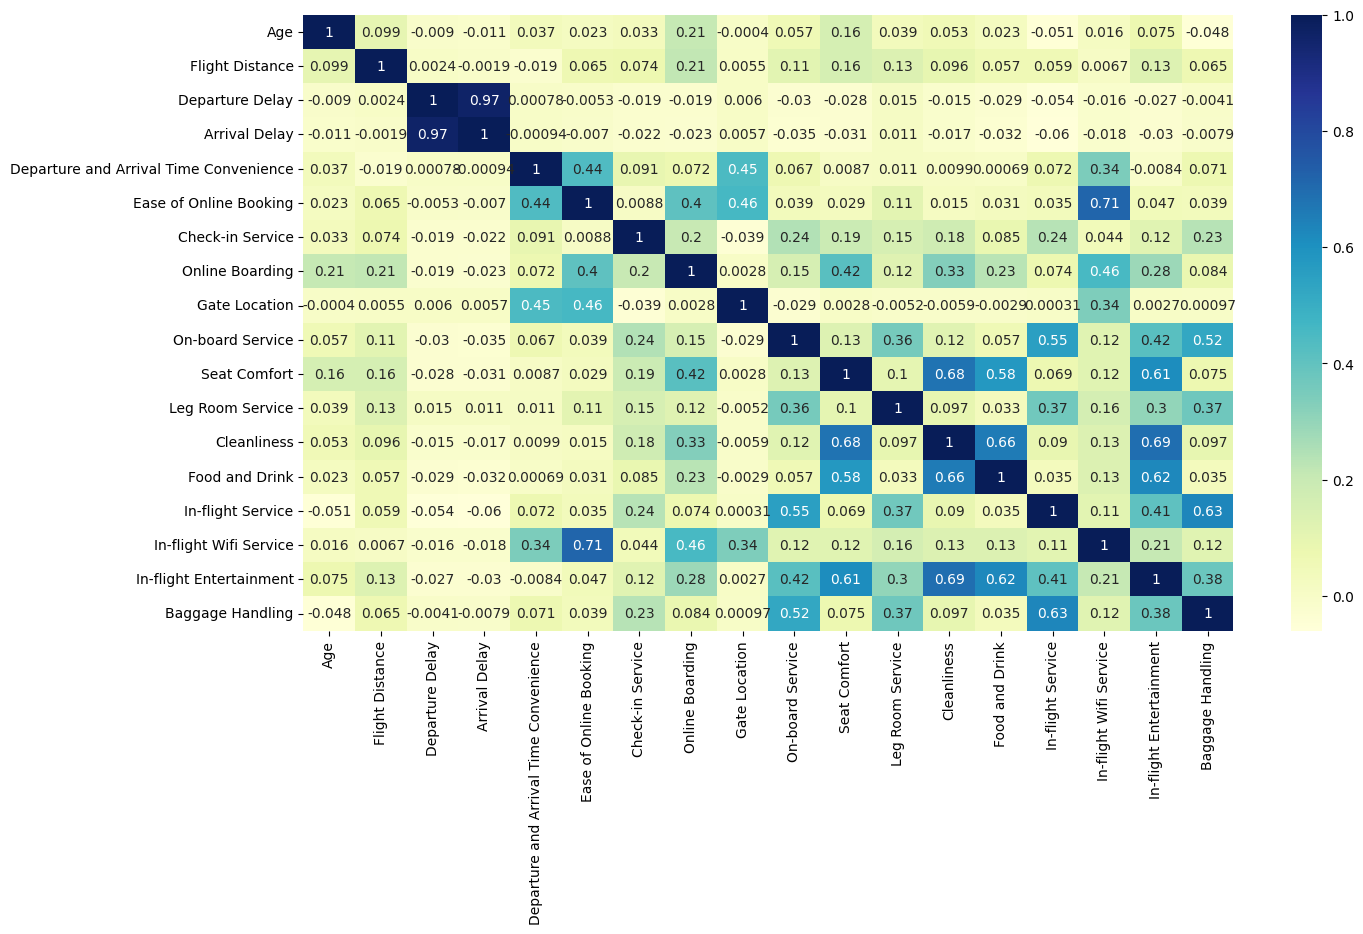

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(df1.corr() , annot = True , cmap = "YlGnBu")

**Observation:**


*   **Strong positive correlation** between Arrival Delay and Departure Delay which is 0.97.
*   **Moderate positive correlation** between In-flight Wi-Fi Service and Ease of Online Booking which is 0.71.








Check outliers of numerical variables in histgram

In [ ]:
# df1.plot(kind='box', subplots=True, layout=(8,5), figsize=(17,20))

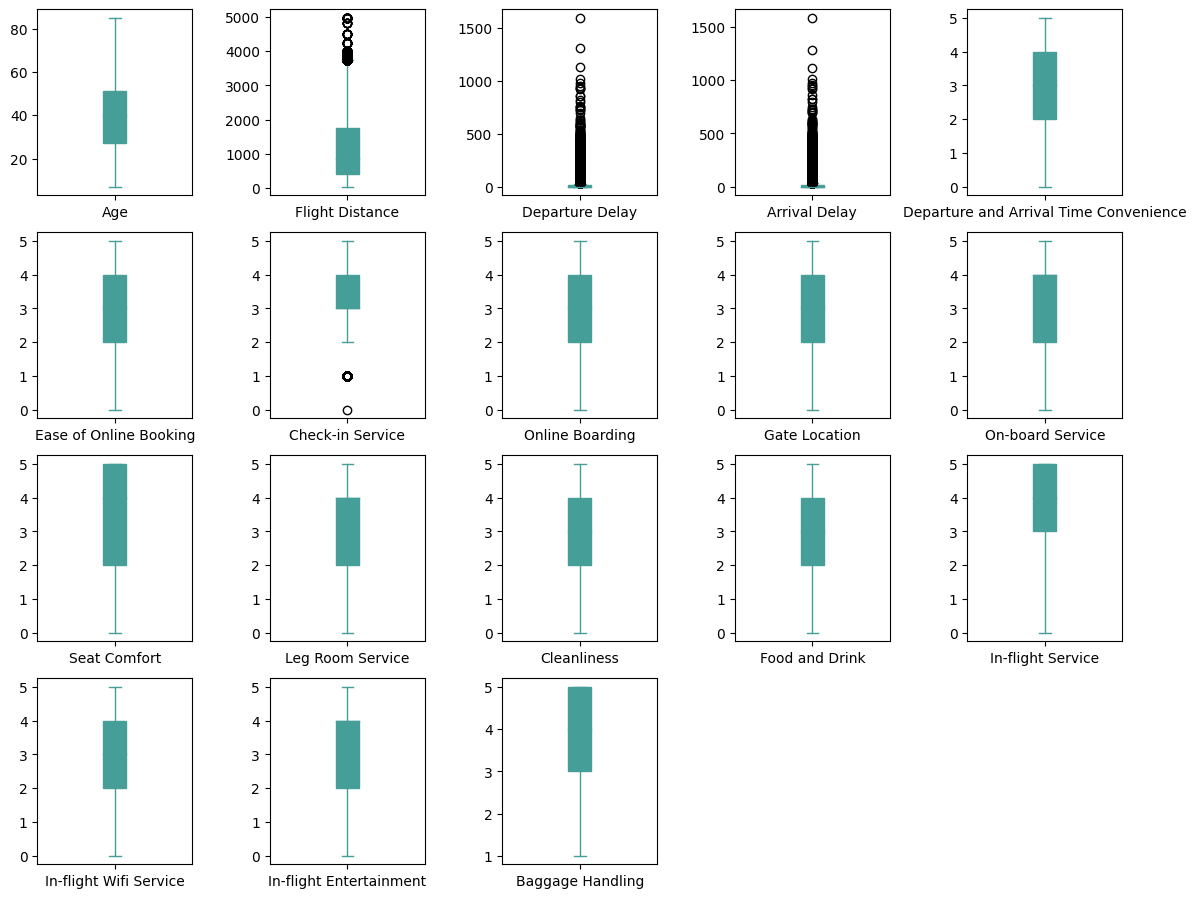

In [ ]:
df1.plot(kind='box', subplots=True, layout=(5,5), figsize=(14,14),patch_artist=True,color="#459E97")
plt.subplots_adjust(wspace = 0.5)

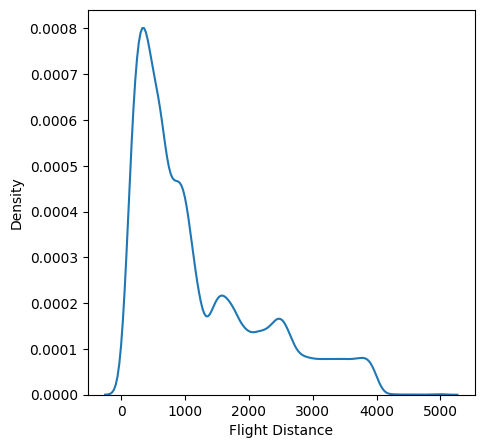

In [ ]:
# check distribution of Flight Distance
plt.figure(figsize = (5,5))
sns.kdeplot(df1['Flight Distance']);

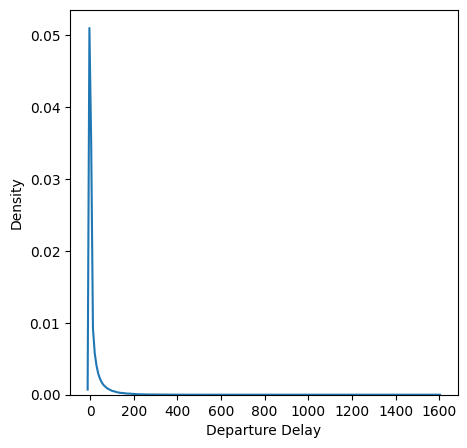

In [ ]:
# check distribution of Departure Delay
plt.figure(figsize = (5,5))
sns.kdeplot(df1['Departure Delay']);

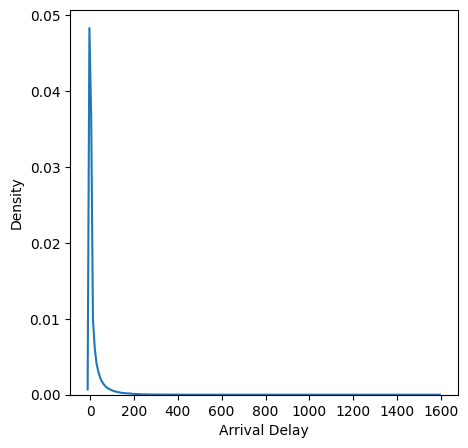

In [ ]:
# check distribution of Arrival Delay
plt.figure(figsize = (5,5))
sns.kdeplot(df1['Arrival Delay']);

Observation:


*   Outliers in Flight Distance, Departure Delay and Arrival Delay
*   The distribution of all three variables are right skewed (Positively Skewed). This means that the mean is often greater than the median.
*   Arrival Delay includes 393 missing values.





# **Data preparation for Supervised Machine Learning**

**Split the original dataset (df1) into Traing set and Test set**

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X = df1.drop(['Satisfaction'], axis=1)
y = df1['Satisfaction']

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 0 , test_size=0.25, shuffle=True)

In [91]:
# view first few rows of train set
X_train.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
ID,,,,,,,,,,,,,,,,,,,,,
2050,Male,47,Returning,Business,Economy,812,63,51.0,3,3,...,3,1,3,1,3,3,3,3,3,3
49177,Female,44,Returning,Business,Business,3285,0,0.0,0,0,...,1,3,3,3,1,3,3,0,3,3
38347,Male,26,Returning,Business,Economy,1173,0,0.0,3,3,...,3,3,4,5,5,5,4,5,5,4
36700,Male,48,Returning,Personal,Economy,1197,9,0.0,5,1,...,2,5,4,2,4,4,4,1,4,1
20522,Female,16,Returning,Personal,Business,533,0,0.0,5,1,...,4,4,5,5,5,5,5,1,5,5


In [92]:
X_train["Arrival Delay"].isnull().sum()

290

In [93]:
X_train["Arrival Delay"].mean()

15.105889621087314

In [94]:
# view first few rows of test set
y_train.head()

ID
2050     Neutral or Dissatisfied
49177                  Satisfied
38347                  Satisfied
36700    Neutral or Dissatisfied
20522    Neutral or Dissatisfied
Name: Satisfaction, dtype: object

In [95]:
# check the size of each set
print(X_train.shape, X_test.shape)

(97410, 22) (32470, 22)


In [96]:
# check missing value of train set
X_train['Arrival Delay'].isnull().sum()

290

In [97]:
# check missing value of test set
X_test['Arrival Delay'].isnull().sum()

103

**This test set contains some missing values. I am looking for a way to split the dataset into tarining and golden standard test set (no missing values in test set)**

**Handling missing value of train set**

In [98]:
# check missing value of train set
missing = X_train.isnull().sum()
missing = missing[missing > 0]
missing = missing.sort_values(ascending = False)
missing

Arrival Delay    290
dtype: int64

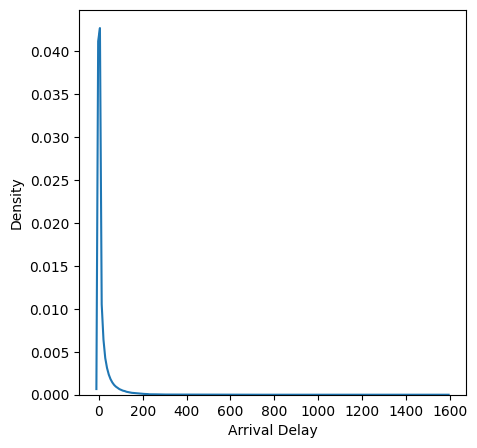

In [99]:
# check the distribution of Arrival Delay of train set
plt.figure(figsize = (5,5))
sns.kdeplot(X_train['Arrival Delay']);

**Observation:**


*   Arrival Delay is right skewed distribtion. Therefore, we will impute the median to the missing values.

In [100]:
modified_X_train = X_train
modified_X_train['Arrival Delay'].fillna(modified_X_train['Arrival Delay'].median(), inplace=True)

In [101]:
modified_X_train['Arrival Delay'].isnull().sum()

0

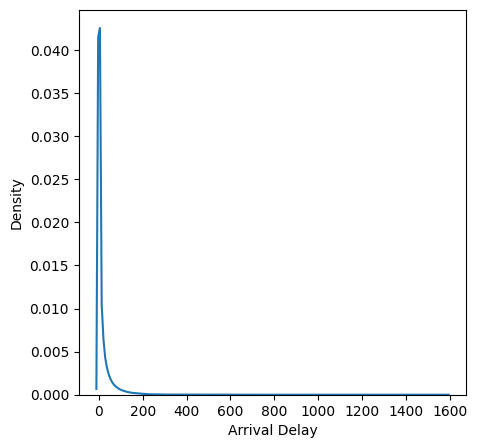

In [102]:
# check the distribution of Arrival Delay of modified_train set (AFTER inpute median value)
plt.figure(figsize = (5,5))
sns.kdeplot(modified_X_train['Arrival Delay']);

**Observation:**
There is no significant change AFTER imputing the median value to fill the missing values.

**Handling missing value of test set**

To avoid data leakage, median value from Train train set is imputed to test set.

In [103]:
modified_X_test = X_test

In [104]:
modified_X_test['Arrival Delay'].fillna(modified_X_train['Arrival Delay'].median(), inplace=True)
modified_X_test['Arrival Delay'].isnull().sum()

0

In [105]:
modified_X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32470 entries, 125670 to 34201
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Gender                                  32470 non-null  object 
 1   Age                                     32470 non-null  int64  
 2   Customer Type                           32470 non-null  object 
 3   Type of Travel                          32470 non-null  object 
 4   Class                                   32470 non-null  object 
 5   Flight Distance                         32470 non-null  int64  
 6   Departure Delay                         32470 non-null  int64  
 7   Arrival Delay                           32470 non-null  float64
 8   Departure and Arrival Time Convenience  32470 non-null  int64  
 9   Ease of Online Booking                  32470 non-null  int64  
 10  Check-in Service                        32470 non-nul

**Handling outliers of train set**

Use IQR (Inter Quartile Range) to finding the outliers and cap the outliers

* capping: to replace the outlier values with a maximum or minimum capped value

**Arrival Delay**

<Axes: ylabel='Arrival Delay'>

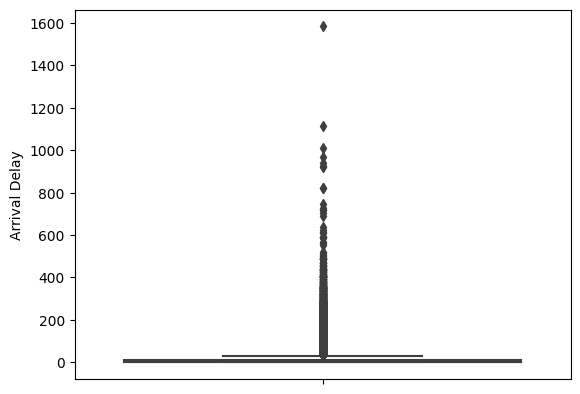

In [106]:
# before capping outliers
sns.boxplot( y="Arrival Delay", data = modified_X_train)

In [107]:
# IQR
Q1 = np.percentile(modified_X_train['Arrival Delay'], 25, method='midpoint')
Q3 = np.percentile(modified_X_train['Arrival Delay'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

13.0


In [108]:
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
print(upper_bound)
print(lower_bound)

32.5
-19.5


In [109]:
modified_X_train["Arrival Delay"] = np.where(modified_X_train["Arrival Delay"]> upper_bound, upper_bound,
                        np.where(modified_X_train["Arrival Delay"]< lower_bound, lower_bound,
                          modified_X_train["Arrival Delay"]))

<Axes: ylabel='Arrival Delay'>

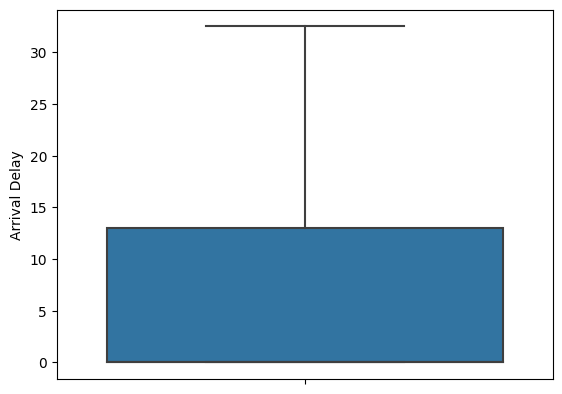

In [110]:
# after capping outliers
sns.boxplot( y="Arrival Delay", data = modified_X_train)

**Flight Distance**

<Axes: ylabel='Flight Distance'>

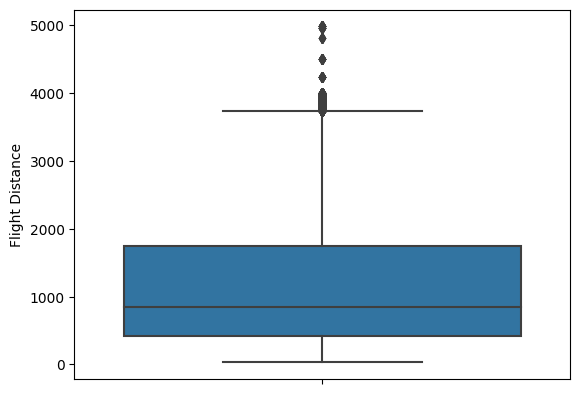

In [111]:
# before capping outliers
sns.boxplot( y="Flight Distance", data = modified_X_train)
# sns.scatterplot(x= modified_train['Flight Distance'] , y = modified_train['Satisfaction'])

In [112]:
# IQR
Q1 = np.percentile(df1['Flight Distance'], 25, method='midpoint')
Q3 = np.percentile(df1['Flight Distance'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

1330.0


In [113]:
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
print(upper_bound)
print(lower_bound)

3739.0
-1581.0


In [114]:
modified_X_train["Flight Distance"] = np.where(modified_X_train["Flight Distance"]> upper_bound, upper_bound,
                        np.where(modified_X_train["Flight Distance"]< lower_bound, lower_bound,
                          modified_X_train["Flight Distance"]))

<Axes: ylabel='Flight Distance'>

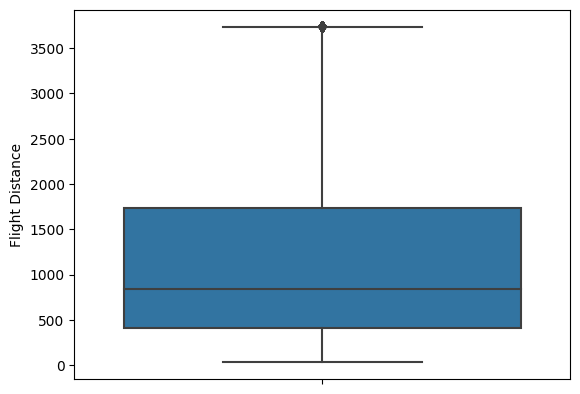

In [115]:
# after capping outliers
sns.boxplot( y="Flight Distance", data = modified_X_train)

**Departure Delay**

<Axes: ylabel='Departure Delay'>

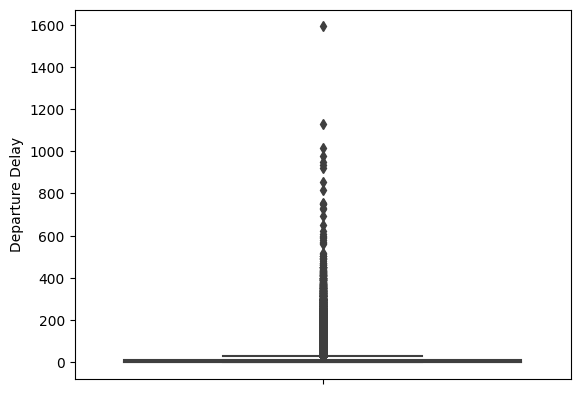

In [116]:
# before capping outliers
sns.boxplot( y="Departure Delay", data = modified_X_train)
# sns.scatterplot(x= modified_train['Departure Delay'] , y = modified_train['Satisfaction'])

In [117]:
# IQR
Q1 = np.percentile(df1['Departure Delay'], 25, method='midpoint')
Q3 = np.percentile(df1['Departure Delay'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

12.0


In [118]:
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
print(upper_bound)
print(lower_bound)

30.0
-18.0


In [119]:
modified_X_train["Departure Delay"] = np.where(modified_X_train["Departure Delay"]> upper_bound, upper_bound,
                        np.where(modified_X_train["Departure Delay"]< lower_bound, lower_bound,
                          modified_X_train["Departure Delay"]))

<Axes: ylabel='Departure Delay'>

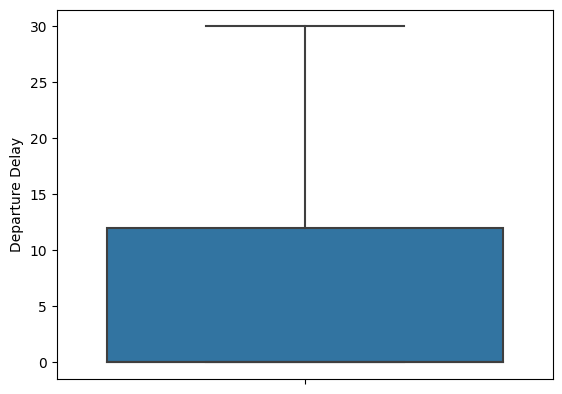

In [120]:
# after capping outliers
sns.boxplot( y="Departure Delay", data = modified_X_train)

**Encoding all categorical variables (columns with type : object) to numerical variables**

In [121]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [122]:
encoded_X_train = modified_X_train

In [123]:
encoded_X_train["Gender"].value_counts()

Female    49432
Male      47978
Name: Gender, dtype: int64

In [124]:
encoded_X_train["Gender"]=le.fit_transform(encoded_X_train["Gender"])
encoded_X_train["Gender"].value_counts()

0    49432
1    47978
Name: Gender, dtype: int64

In [125]:
encoded_X_train["Customer Type"].value_counts()

Returning     79497
First-time    17913
Name: Customer Type, dtype: int64

In [126]:
encoded_X_train["Customer Type"]=le.fit_transform(encoded_X_train["Customer Type"])
encoded_X_train["Customer Type"].value_counts()

1    79497
0    17913
Name: Customer Type, dtype: int64

In [127]:
encoded_X_train["Type of Travel"].value_counts()

Business    67234
Personal    30176
Name: Type of Travel, dtype: int64

In [128]:
encoded_X_train["Type of Travel"]=le.fit_transform(encoded_X_train["Type of Travel"])
encoded_X_train["Type of Travel"].value_counts()

0    67234
1    30176
Name: Type of Travel, dtype: int64

In [129]:
encoded_X_train["Class"].value_counts()

Business        46509
Economy         43832
Economy Plus     7069
Name: Class, dtype: int64

In [130]:
encoded_X_train["Class"]=le.fit_transform(encoded_X_train["Class"])
encoded_X_train["Class"].value_counts()

0    46509
1    43832
2     7069
Name: Class, dtype: int64

In [131]:
encoded_X_train.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
ID,,,,,,,,,,,,,,,,,,,,,
2050,1,47,1,0,1,812.0,30.0,32.5,3,3,...,3,1,3,1,3,3,3,3,3,3
49177,0,44,1,0,0,3285.0,0.0,0.0,0,0,...,1,3,3,3,1,3,3,0,3,3
38347,1,26,1,0,1,1173.0,0.0,0.0,3,3,...,3,3,4,5,5,5,4,5,5,4
36700,1,48,1,1,1,1197.0,9.0,0.0,5,1,...,2,5,4,2,4,4,4,1,4,1
20522,0,16,1,1,0,533.0,0.0,0.0,5,1,...,4,4,5,5,5,5,5,1,5,5


In [132]:
y_train.value_counts()

Neutral or Dissatisfied    55153
Satisfied                  42257
Name: Satisfaction, dtype: int64

In [133]:
encoded_y_train=le.fit_transform(y_train)
encoded_y_train

array([0, 1, 1, ..., 1, 0, 0])

In [134]:
encoded_y_train = pd.DataFrame(encoded_y_train, index=encoded_y_train)

In [135]:
encoded_y_train.columns = ['Satisfaction']

In [136]:
encoded_y_train.head()

,Satisfaction
0,0
1,1
1,1
0,0
0,0


**Applying Feature Selection to reduce dimensions**

In [137]:
# Pre-processing and scaling dataset for feature selection
from sklearn import preprocessing

r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(encoded_X_train)

encoded_X_train_scaled = pd.DataFrame(r_scaler.transform(encoded_X_train), columns = encoded_X_train.columns)
encoded_X_train_scaled.head()

encoded_y_train_scaled = encoded_y_train

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

21
<class 'matplotlib.axes._axes.Axes'>


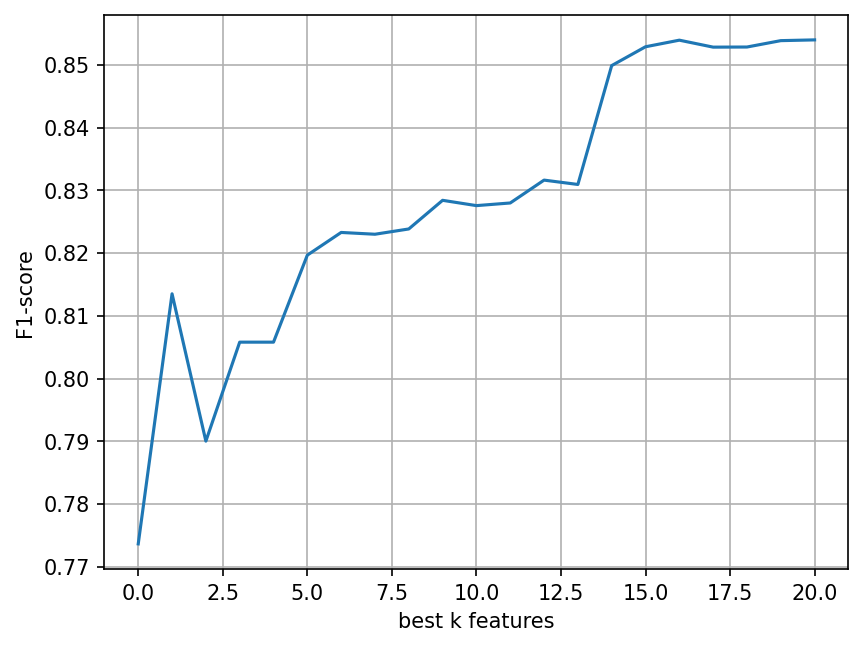

In [138]:
# Finding the best K for feature selection

import sklearn.feature_selection as fs
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

X = encoded_X_train_scaled
y = encoded_y_train_scaled

f1_list = []
for k in range(1, 22):
    bk = fs.SelectKBest(fs.f_classif, k = k)
    bk.fit(X, y)
    X_trans = bk.transform(X)
    train_x, test_x, train_y, test_y = train_test_split(X_trans,
                                                        y,
                                                        test_size=0.2,
                                                        random_state=42)
    lr = LogisticRegression()
    lr.fit(train_x, train_y)
    y_pred = lr.predict(test_x)
    #f1 = metrics.f1_score(test_y, y_pred, pos_label="Satisfied")
    f1 = metrics.f1_score(test_y, y_pred)
    f1_list.append(f1)

print(len(f1_list))

fig, axe = plt.subplots(dpi = 150)

print(type(axe))

axe.plot(range(0, len(f1_list)), f1_list)
axe.set_xlabel("best k features")
axe.set_ylabel("F1-score")
plt.grid(True)
plt.show()
# fig.savefig("img.png")
# plt.close(fig)

In [139]:
# Feature selection, applying Select K Best to output the 14 most important features
from sklearn.feature_selection import SelectKBest, f_classif

# X = encoded_X_train_scaled.loc[:,encoded_X_train_scaled.columns!='Satisfaction']
X = encoded_X_train_scaled
y = encoded_y_train_scaled

selector = SelectKBest(f_classif, k = 14)
selector.fit(X, y)
selected_X_train_scaled = selector.transform(X)

features = (X.columns[selector.get_support(indices=True)])
features

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['Type of Travel', 'Class', 'Flight Distance', 'Check-in Service',
       'Online Boarding', 'On-board Service', 'Seat Comfort',
       'Leg Room Service', 'Cleanliness', 'Food and Drink',
       'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling'],
      dtype='object')

In [140]:
features = pd.DataFrame(selected_X_train_scaled[selector.get_support(indices=True)])
# features.head()

In [141]:
features.columns = ['Type of Travel', 'Class', 'Flight Distance', 'Check-in Service',
       'Online Boarding', 'On-board Service', 'Seat Comfort',
       'Leg Room Service', 'Cleanliness', 'Food and Drink',
       'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling']

In [142]:
features.head()

,Type of Travel,Class,Flight Distance,Check-in Service,Online Boarding,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
0,1.0,0.5,0.314455,0.4,0.2,1.0,0.8,0.4,0.8,0.8,0.8,0.2,0.8,0.00
1,1.0,0.0,0.135383,0.6,0.2,0.8,1.0,1.0,1.0,1.0,1.0,0.2,1.0,1.00
2,0.0,0.5,0.174757,0.8,0.6,0.8,0.4,0.2,0.4,0.4,0.6,0.6,0.4,0.75
3,1.0,0.5,0.154531,1.0,0.2,1.0,1.0,1.0,1.0,1.0,1.0,0.2,1.0,0.75
4,0.0,0.0,0.307983,0.8,0.8,1.0,1.0,0.8,1.0,1.0,0.8,0.8,1.0,1.00


In [143]:
selected_X_train_scaled.shape

(97410, 14)

**Applying undersampling, oversampling and SMOTE to address the imbalance in the target class, "Satisfaction".**

**Applying SMOTE**

In [144]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# define dataset
X_SMOTE = selected_X_train_scaled
y_SMOTE = encoded_y_train_scaled
# summarize class distribution
counter = Counter(y_SMOTE)
print('Before SMOTE',(counter))
# transform the dataset
oversample = SMOTE()
X_SMOTE, y_SMOTE = oversample.fit_resample(X_SMOTE, y_SMOTE)
# summarize the new class distribution
counter = Counter(y_SMOTE)
print('After SMOTE',(counter))

Before SMOTE Counter({'Satisfaction': 1})
After SMOTE Counter({'Satisfaction': 1})


In [145]:
SMOTE_train = pd.DataFrame(X_SMOTE)
SMOTE_train.columns = features.columns

In [146]:
SMOTE_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110306 entries, 0 to 110305
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Type of Travel           110306 non-null  float64
 1   Class                    110306 non-null  float64
 2   Flight Distance          110306 non-null  float64
 3   Check-in Service         110306 non-null  float64
 4   Online Boarding          110306 non-null  float64
 5   On-board Service         110306 non-null  float64
 6   Seat Comfort             110306 non-null  float64
 7   Leg Room Service         110306 non-null  float64
 8   Cleanliness              110306 non-null  float64
 9   Food and Drink           110306 non-null  float64
 10  In-flight Service        110306 non-null  float64
 11  In-flight Wifi Service   110306 non-null  float64
 12  In-flight Entertainment  110306 non-null  float64
 13  Baggage Handling         110306 non-null  float64
dtypes: f

In [147]:
y_SMOTE.value_counts()

Satisfaction
0               55153
1               55153
dtype: int64

**Applying undersampling**

In [148]:
from imblearn.under_sampling import RandomUnderSampler
# define dataset
X_under = selected_X_train_scaled
y_under = encoded_y_train_scaled
# summarize class distribution
print('Before UnderSampling',(Counter(y_under)))
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_under, y_under = undersample.fit_resample(X_under, y_under)
# summarize class distribution
print('After UnderSampling',(Counter(y_under)))

Before UnderSampling Counter({'Satisfaction': 1})
After UnderSampling Counter({'Satisfaction': 1})


In [149]:
undersampling_train = pd.DataFrame(X_under)
undersampling_train.columns = features.columns

In [150]:
undersampling_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84514 entries, 0 to 84513
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type of Travel           84514 non-null  float64
 1   Class                    84514 non-null  float64
 2   Flight Distance          84514 non-null  float64
 3   Check-in Service         84514 non-null  float64
 4   Online Boarding          84514 non-null  float64
 5   On-board Service         84514 non-null  float64
 6   Seat Comfort             84514 non-null  float64
 7   Leg Room Service         84514 non-null  float64
 8   Cleanliness              84514 non-null  float64
 9   Food and Drink           84514 non-null  float64
 10  In-flight Service        84514 non-null  float64
 11  In-flight Wifi Service   84514 non-null  float64
 12  In-flight Entertainment  84514 non-null  float64
 13  Baggage Handling         84514 non-null  float64
dtypes: float64(14)
memory 

In [151]:
y_under.value_counts()

Satisfaction
0               42257
1               42257
dtype: int64

**Applying oversampling**

In [152]:
from imblearn.over_sampling import RandomOverSampler
# define dataset
X_over = selected_X_train_scaled
# y_over = y_train
y_over = encoded_y_train_scaled
# summarize class distribution
print('Before OverSampling',(Counter(y_over)))
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_over, y_over)
# summarize class distribution
print('After OverSampling',(Counter(y_over)))

Before OverSampling Counter({'Satisfaction': 1})
After OverSampling Counter({'Satisfaction': 1})


In [153]:
oversampling_train = pd.DataFrame(X_over)
oversampling_train.columns = features.columns

In [154]:
oversampling_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110306 entries, 0 to 110305
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Type of Travel           110306 non-null  float64
 1   Class                    110306 non-null  float64
 2   Flight Distance          110306 non-null  float64
 3   Check-in Service         110306 non-null  float64
 4   Online Boarding          110306 non-null  float64
 5   On-board Service         110306 non-null  float64
 6   Seat Comfort             110306 non-null  float64
 7   Leg Room Service         110306 non-null  float64
 8   Cleanliness              110306 non-null  float64
 9   Food and Drink           110306 non-null  float64
 10  In-flight Service        110306 non-null  float64
 11  In-flight Wifi Service   110306 non-null  float64
 12  In-flight Entertainment  110306 non-null  float64
 13  Baggage Handling         110306 non-null  float64
dtypes: f

In [156]:
y_over.value_counts()

Satisfaction
0               55153
1               55153
dtype: int64

**Building Models**

**Apply Random Forest, k-Nearest Neighbours, and Gradient Boosting (Extreme Gradient Boosting (XGBoost))**

**Random Forest: SMOTE**

In [157]:
from sklearn.ensemble import RandomForestClassifier

In [158]:
RF = RandomForestClassifier(max_features= 14,  max_depth=7)

In [159]:
RF.fit(SMOTE_train , y_SMOTE)
RF.score(SMOTE_train , y_SMOTE)

<ipython-input-159-d365d61def11>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(SMOTE_train , y_SMOTE)


0.9291969611807155

**Random Forest: undersampling**

In [160]:
RF.fit(undersampling_train, y_under)
RF.score(undersampling_train, y_under)

<ipython-input-160-8503aaaec792>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(undersampling_train, y_under)


0.9274203090612206

**Random Forest: oversampling**

In [161]:
RF.fit(oversampling_train, y_over)
RF.score(oversampling_train, y_over)

<ipython-input-161-c7bc34fba153>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(oversampling_train, y_over)


0.9266495022936195

**Observation**: Random Forest: SMOTE is the highest score, 92.9 but there is no significant difference.

**Checking the important features using Random Forest: SMOTE**

<ipython-input-180-7e9ccdfb3c27>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(RF_SMOTE_train , RF_y_SMOTE)


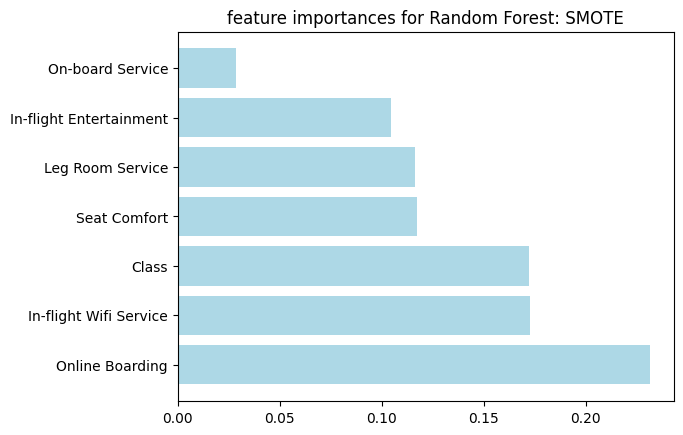

In [180]:
RF_SMOTE_train = SMOTE_train
RF_y_SMOTE = y_SMOTE

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center', color = 'LightBlue')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for Random Forest: SMOTE')
    plt.show()

features_names = RF_SMOTE_train.columns

rf = RandomForestClassifier(n_estimators=4 , max_depth=3 , min_samples_split=25 , max_features=4, random_state=0)
rf.fit(RF_SMOTE_train , RF_y_SMOTE)
f_importances(abs(rf.feature_importances_), features_names, top=7)

**KNN: SMOTE**

In [169]:
from sklearn.neighbors import KNeighborsClassifier

In [170]:
KNN = KNeighborsClassifier(n_neighbors=5)

In [171]:
KNN.fit(SMOTE_train , y_SMOTE)
KNN.score(SMOTE_train , y_SMOTE)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9552698855909924

**KNN: undersampling**

In [172]:
KNN.fit(undersampling_train, y_under)
KNN.score(undersampling_train, y_under)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9443287502662281

**KNN: oversampling**

In [86]:
KNN.fit(oversampling_train, y_over)
KNN.score(oversampling_train, y_over)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9511268652657153

**Observation**: KNN: SMOTE is the highest score, 95.5 but there is no significant difference.

**Checking the important features using KNN: SMOTE**

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


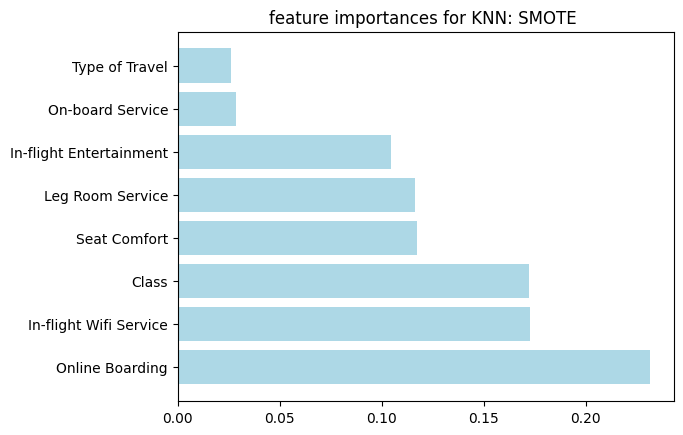

In [209]:
KNN_SMOTE_train = SMOTE_train
KNN_y_SMOTE = y_SMOTE

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center', color = 'LightBlue')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for KNN: SMOTE ')
    plt.show()

features_names = KNN_SMOTE_train.columns

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(KNN_SMOTE_train , KNN_y_SMOTE)
f_importances(abs(rf.feature_importances_), features_names, top=8)

**XGBoost: SMOTE**

In [174]:
from xgboost import XGBClassifier

In [175]:
XGB = XGBClassifier(max_depth = 18 , n_estimators= 6)

In [176]:
XGB.fit(SMOTE_train , y_SMOTE)
XGB.score(SMOTE_train , y_SMOTE)

0.9748608416586586

**XGBoost: undersampling**

In [177]:
XGB.fit(undersampling_train, y_under)
XGB.score(undersampling_train, y_under)

0.9741107982109473

**XGBoost: oversampling**

In [178]:
XGB.fit(oversampling_train, y_over)
XGB.score(oversampling_train, y_over)

0.9762388265370877

**Observation**: XGBoost: oversampling = Highest score, 97.6 but but there is no significant difference.

**Checking the important features using XGBoost: oversampling**

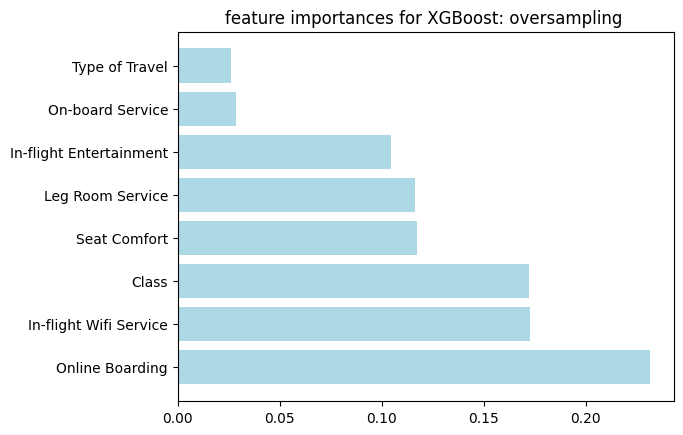

In [210]:
XGB_oversampling_train = oversampling_train
XGB_y_over = y_over

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center', color = 'LightBlue')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for XGBoost: oversampling ')
    plt.show()

features_names = XGB_oversampling_train.columns

xgb = XGBClassifier(max_depth = 18 , n_estimators= 6)
xgb.fit(XGB_oversampling_train , XGB_y_over)
f_importances(abs(rf.feature_importances_), features_names, top=8)

In [213]:
import sklearn
import time
from resource import getrusage, RUSAGE_SELF
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [216]:
# Model activation and result plot function
def get_model_metrics(model, SMOTE_train, modified_X_test, y_SMOTE, y_test):

    '''
    Model activation function, takes in model as a parameter and returns metrics as specified.

    Inputs:
        model,  SMOTE_train, modified_X_test, y_SMOTE, y_test
    Output:
        Model output metrics, confusion matrix, ROC AUC curve
    '''

    # Mark of current time when model began running
    t0 = time.time()

    # Fit the model on the training data and run predictions on test data
    model.fit(SMOTE_train,  y_SMOTE)
    y_pred = model.predict(modified_X_test)
    y_pred_proba = model.predict_proba(modified_X_test)[:,1]
    # Obtain training accuracy as a comparative metric using Sklearn's metrics package
    train_score = model.score(SMOTE_train,  y_SMOTE)
    # Obtain testing accuracy as a comparative metric using Sklearn's metrics package
    accuracy = accuracy_score(y_test, y_pred)
    # Obtain precision from predictions using Sklearn's metrics package
    precision = precision_score(y_test, y_pred)
    # Obtain recall from predictions using Sklearn's metrics package
    recall = recall_score(y_test, y_pred)
    # Obtain ROC score from predictions using Sklearn's metrics package
    roc = roc_auc_score(y_test, y_pred_proba)
    # Obtain the time taken used to run the model, by subtracting the start time from the current time
    time_taken = time.time() - t0
    # Obtain the resources consumed in running the model
    memory_used = int(getrusage(RUSAGE_SELF).ru_maxrss / 1024)

    # Outputting the metrics of the model performance
    print("Accuracy on Training = {}".format(train_score))
    print("Accuracy on Test = {} • Precision = {}".format(accuracy, precision))
    print("Recall = {} • ROC Area under Curve = {}".format(recall, roc))
    print("F1 = {} • ROC Area under Curve = {}".format(f1, roc))
    print("Time taken = {} seconds • Memory consumed = {} Bytes".format(time_taken, memory_used))

    # Plotting the confusion matrix of the model's predictive capabilities
    plt.confusion_matrix(model, modified_X_test, y_test, cmap = plt.cm.Blues, normalize = 'all')
    # Plotting the ROC AUC curve of the model
    plt.roc_curve(model, modified_X_test, y_test)
    plt.show()

    return model, train_score, accuracy, precision, recall, roc, time_taken, memory_used
